# Solve the Sudoku


Given an incomplete Sudoku configuration in terms of a 9x9  2-D interger square matrix, mat[][], the task is to solve the Sudoku. It is guaranteed that the input Sudoku will have exactly one solution.

A sudoku solution must satisfy all of the following rules:

Each of the digits 1-9 must occur exactly once in each row.

Each of the digits 1-9 must occur exactly once in each column.

Each of the digits 1-9 must occur exactly once in each of the 9 3x3 sub-boxes of the grid.

Note: Zeros represent blanks to be filled with numbers 1-9, while non-zero cells are fixed and cannot be changed.

Examples:

##### Input: mat[][] = 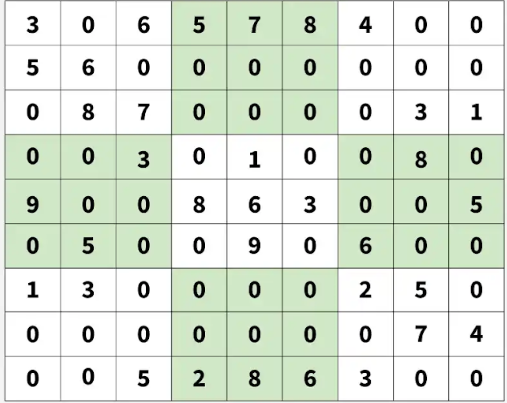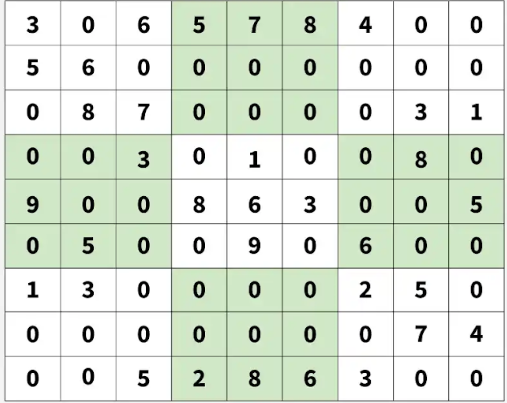

##### Output: 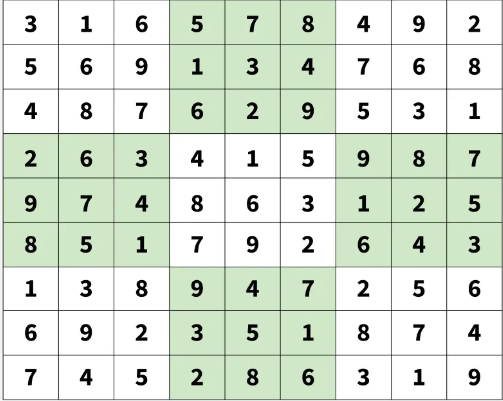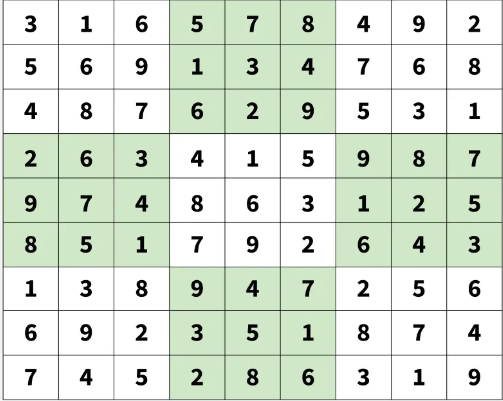

Explanation: Each row, column and 3 x 3 box of the output matrix contains unique numbers.
##### Input: mat[][] = 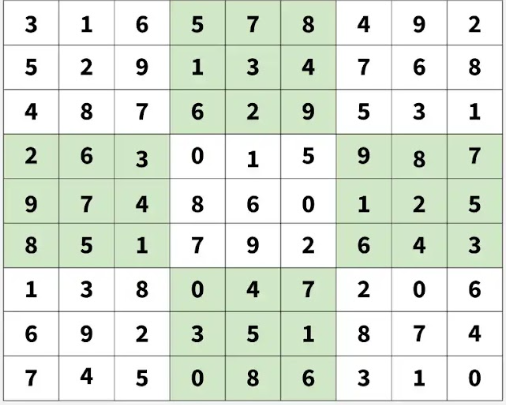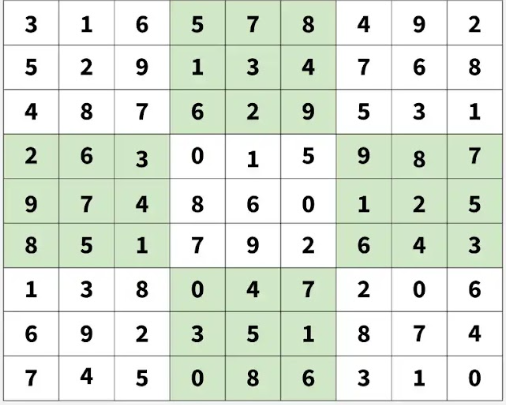

##### Output: 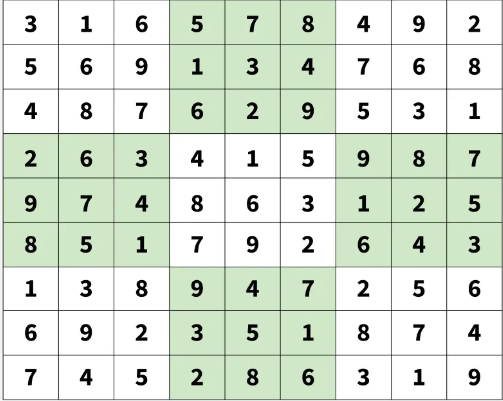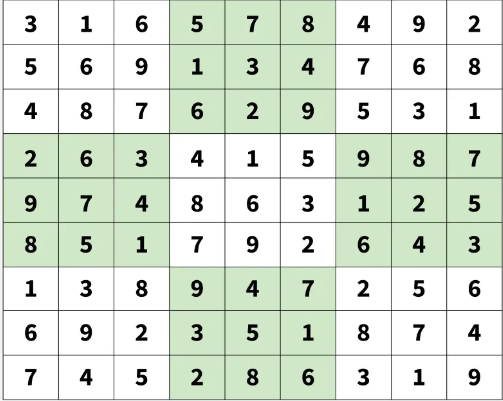

Explanation: Each row, column and 3 x 3 box of the output matrix contains unique numbers.
### Constraints:
##### mat.size() = 9
##### mat[i].size() = 9
##### 0 ≤ mat[i][j] ≤ 9

In [1]:
class Solution:
    def sudokuSolverRec(self,mat,i,j,row,col,box):
        n=len(mat)
        if i==n-1 and j==n:
            return True
        if j==n:
            i+=1
            j=0
            
        if mat[i][j]!=0:
            return self.sudokuSolverRec(mat,i,j+1,row,col,box)
            
        for num in range(1,n+1):
            if self.isSafe(mat,i,j,num,row,col,box):
                mat[i][j]=num
                
                row[i]|=(1<<num)
                col[j]|=(1<<num)
                box[i//3*3 + j//3]|=(1<<num)
                
                if(self.sudokuSolverRec(mat,i,j+1,row,col,box)):
                    return True
                mat[i][j]=0
                row[i]&= ~(1<<num)
                col[j]&= ~(1<<num)
                box[i//3*3 + j//3]&= ~(1<<num)
        return False
    
    def isSafe(self,mat,i,j,num,row,col,box):
        if (row[i] & (1<<num)) or (col[j] & (1<<num)) or (box[i//3*3+j//3] & (1<<num)):
            return False
        return True
    
    #Function to find a solved Sudoku. 
    def solveSudoku(self, mat):
        
        # Your code here
        n=len(mat)
        row=[0]*n
        col=[0]*n
        box=[0]*n
        for i in range(n):
            for j in range(n):
                if mat[i][j]:
                    row[i]|=(1<<mat[i][j])
                    col[j]|=(1<<mat[i][j])
                    box[(i//3)*3 + j//3] |= (1<<mat[i][j])
        self.sudokuSolverRec(mat,0,0,row,col,box)
